Machine learning is a complex instrument that is still being fined tuned through the years. Machine learning is defined as "the use and development of computer systems that can learn and adapt without following explicit instructions, by using algorithms and statistical models to analyze and draw inferences from patterns in data." With this definition we can see what machine learning is better suited for. Machine learning is usually best used for programs that you are trying to create that have many rules and they are overlapping. When it comes to humans there are only so many rules that we can implement into our code before it becomes too complex, and mistakes are made. This is where machine learning can come in handy and take this burden from our shoulders. Instead of implementing every rule ourselves we have machine learning, see what we are trying to do and learn from problems and what kind of solution/outcome we want. Machine learning will then add rules that are needed and remove those that are not. Also, since it is a computer, it is better equipped at handling tasks that require dealing with large sets of data. However, even though machine learning is useful it should not be abused and used for everything. Machine learning should not be used when you do not have any data otherwise it will not have anything to learn from. Another time when machine learning should not be used is when there is a lack understanding/cannot be grow from the problem and that things cannot grow/evolve/change. This halts the machine learning process if it cannot continue to learn. Finally, one of the most important times to not use machine learning is when the problem is not clearly defined just like with human's machines cannot learn and progress if they do not know what they are looking for.   

 

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("titanic.csv", delimiter=",")
sex_map = {"male":1,"female":2}
df["Sex"] = df["Sex"].map(sex_map)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


Converted Categorial Values to Numerical

In [4]:
df["Embarked"] = np.where(df["Embarked"] == "C", "Cherbourg",
np.where(df["Embarked"] == "Q", "Queensland",
np.where(df["Embarked"] == "S", "Southampton", "")))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,Cherbourg


Edited an already existing column to spell out where they Embarked from so you don't have to know the letter alone

In [5]:
df = pd.get_dummies(df[["Survived", "PassengerId", "Age"]])
df

,Survived,PassengerId,Age
0,0,1,22.0
1,1,2,38.0
2,1,3,26.0
3,1,4,35.0
4,0,5,35.0
...,...,...,...
886,0,887,27.0
887,1,888,19.0
888,0,889,NaN
889,1,890,26.0


Used One hot encoding for the columns Survived, PassengerId, and Age

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: >

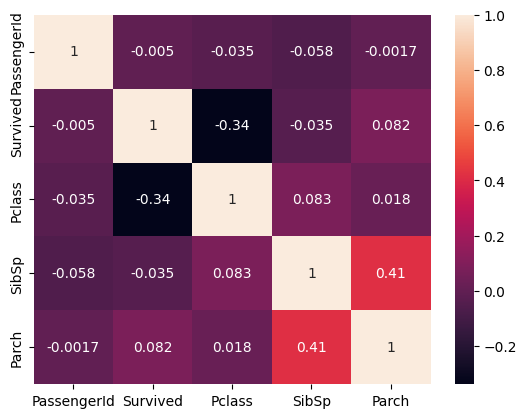

In [7]:
sns.heatmap(df[["PassengerId", "Survived", "Pclass", "SibSp", "Parch"]].corr(), annot=True)


There is a negative correlation in most except for a neutral going diagnoally across the heat map. As well as a high positive correlation in the bottom right with SibSp at 0.41 and Parch also at 0.41

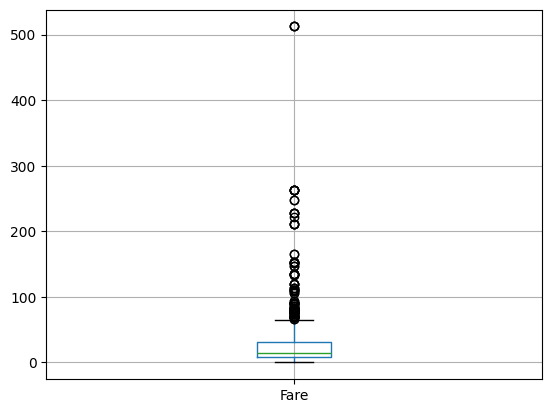

In [8]:
boxplot = df.boxplot(column = ["Fare"], return_type="axes")

It shows the data of the "Fare" prices but it seems that there is a lot of outliers when it comes to the prices of the Fare

In [9]:
import time
time1 = time.perf_counter()
df["Age_bin"] = df["Age"].apply(lambda x: "Young" if x < 18 else
"Older" if x < 30 else
"Pretty Old" if x < 45 else "Super Old")
time2 = time.perf_counter()
print(time2 - time1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Older
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Pretty Old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Older
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Pretty Old
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Pretty Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Older
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Older
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Super Old
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Older


In [10]:
df["Age_bin_np"] = np.where(df["Age"] < 18, "Young",
np.where(df["Age"] < 30, "Older",
np.where(df["Age"] < 45, "Pretty Old",
np.where(df["Age"] < 99, "Super Old", ""))))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Age_bin_np
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Older,Older
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Pretty Old,Pretty Old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Older,Older
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Pretty Old,Pretty Old
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Pretty Old,Pretty Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Older,Older
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Older,Older
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Super Old,
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Older,Older


The lambda function is more effective for it takes less time and also doesn't look information

In [13]:
young_df = df.loc[df["Age_bin"] == "Young"]
older_df = df.loc[df["Age_bin"] == "Older"]
pretty_old_df = df.loc[df["Age_bin"] == "Pretty Old"]
super_old_df = df.loc[df["Age_bin"] == "Super Old"]

Text(0.5, 1.0, 'Super Old')

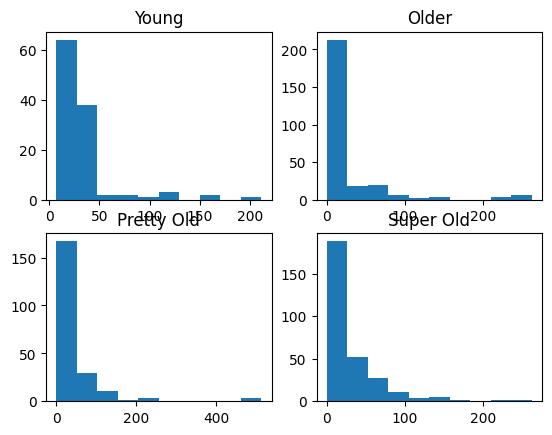

In [17]:
x = young_df["Fare"]
plt.subplot(2,2,1)
plt.hist(x)
plt.title("Young")
x = older_df["Fare"]
plt.subplot(2,2,2)
plt.hist(x)
plt.title("Older")
x = pretty_old_df["Fare"]
plt.subplot(2,2,3)
plt.hist(x)
plt.title("Pretty Old")
x = super_old_df["Fare"]
plt.subplot(2,2,4)
plt.hist(x)
plt.title("Super Old")

Through the graph we can see that those who are "Pretty Old" and those who are "Super Old" are spending around the same amount on their Fare. "Young" are spending the least amount on their fair most likely because they aren't even capable of paying for it depending on their age and "Older" are spending the most on their Fare compared to the other 3.